In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image
from PIL import Image 

In [2]:
data_dir=r"C:\Users\HP\Downloads\Fruit Freshness Dataset\Fruit Freshness Dataset"

In [3]:
import tensorflow as tf

tr_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=(224, 224),
    batch_size=64
)


Found 529 files belonging to 3 classes.


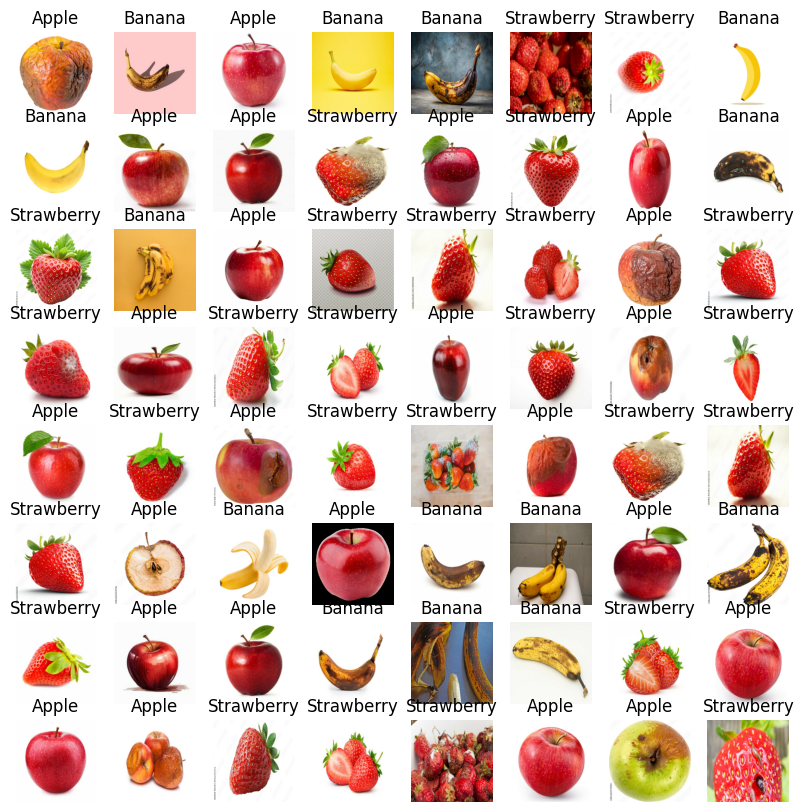

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

for images, labels in tr_dataset.take(1):
    for i in range(64):
        plt.subplot(8, 8, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(tr_dataset.class_names[labels[i]])
        plt.axis("off")

plt.show()


In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(224, 224),
    batch_size=32
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(224, 224),
    batch_size=32
)


Found 529 files belonging to 3 classes.
Using 424 files for training.
Found 529 files belonging to 3 classes.
Using 105 files for validation.


In [6]:
model = tf.keras.Sequential([
    layers.Input(shape=(224, 224, 3)),
    #layers.Rescaling(1./255),
    
    layers.Conv2D(128,3, activation="relu"),
    layers.MaxPooling2D(),

    layers.Conv2D(256, 3, activation="relu"),
    layers.MaxPooling2D(),

    layers.Conv2D(512, 3, activation="relu"),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(256, activation="relu"),
    layers.Dense(32, activation="softmax")

])

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 256)       │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 346112)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      44,302,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           8,224 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,822,624 (174.80 MB)

 Trainable params: 45,822,624 (174.80 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.Nadam(learning_rate=0.0009), metrics=["accuracy"])

In [9]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 142s 10s/step - accuracy: 0.2689 - loss: 153.9238 - val_accuracy: 0.6095 - val_loss: 0.9109
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 159s 11s/step - accuracy: 0.5118 - loss: 2.8787 - val_accuracy: 0.6667 - val_loss: 1.2350
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 168s 12s/step - accuracy: 0.6108 - loss: 1.0060 - val_accuracy: 0.6952 - val_loss: 0.8993
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 166s 12s/step - accuracy: 0.8090 - loss: 0.4535 - val_accuracy: 0.8190 - val_loss: 0.4115
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 184s 13s/step - accuracy: 0.8396 - loss: 0.6146 - val_accuracy: 0.7048 - val_loss: 0.8070
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 174s 12s/step - accuracy: 0.8042 - loss: 0.5417 - val_accuracy: 0.7810 - val_loss: 2.2231
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 196s 14s/step - accuracy: 0.7476 - loss: 0.6972 - val_accuracy: 0.8000 - val_loss: 0.7082
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 203s 14s/step - accuracy: 0.8915 - loss: 0.3709 - val_accuracy: 

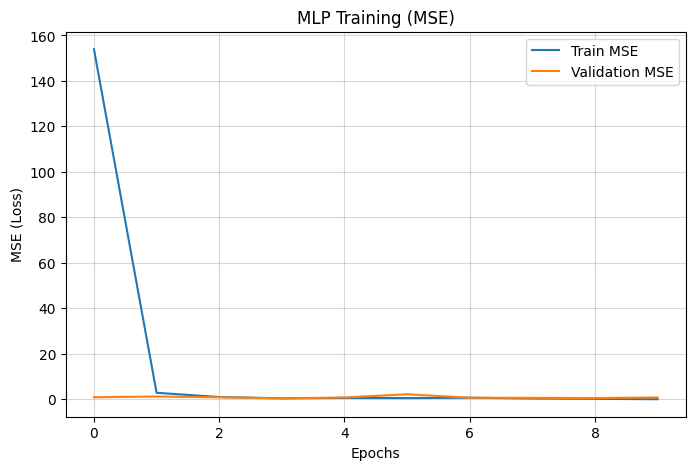

In [10]:
def plot_mlp_history(history, title="MLP Training (MSE)"):
    plt.figure(figsize=(8,5))
    plt.plot(history.history['loss'], label='Train MSE')
    plt.plot(history.history['val_loss'], label='Validation MSE')
    plt.xlabel('Epochs')
    plt.ylabel('MSE (Loss)')
    plt.title(title)
    plt.grid(alpha=0.5)
    plt.legend()
    plt.show()
plot_mlp_history(history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


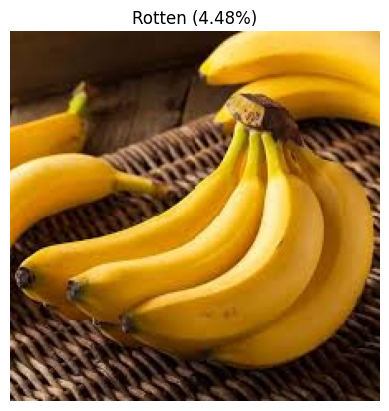

In [11]:
img_path = r"D:\images.jpg"  # UPDATE THIS

# Load & preprocess image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

# Predict
prediction = model.predict(img_array)

class_names = ["Fresh","other", "Rotten"]  # change if needed
predicted_class = class_names[np.argmax(prediction)]
confidence = np.max(prediction) * 100

# Show result
plt.imshow(img)
plt.title(f"{predicted_class} ({confidence:.2f}%)")
plt.axis("off")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


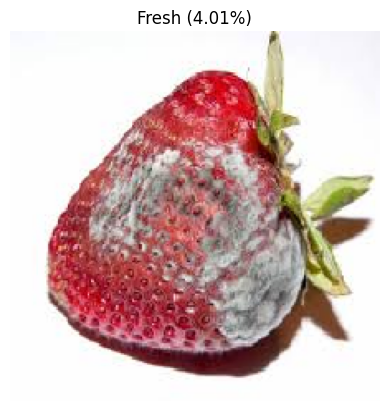

In [12]:
img_path = r"D:\download (1).jpg"  # UPDATE THIS

# Load & preprocess image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

# Predict
prediction = model.predict(img_array)

class_names = ["Fresh","other", "Rotten"]  # change if needed
predicted_class = class_names[np.argmax(prediction)]
confidence = np.max(prediction) * 100

# Show result
plt.imshow(img)
plt.title(f"{predicted_class} ({confidence:.2f}%)")
plt.axis("off")
plt.show()
